In [ ]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
import math

warnings.filterwarnings('ignore')

In [56]:
queries = ['10a.sql.csv', '12a.sql.csv', '14a.sql.csv', '16a.sql.csv', '17d.sql.csv', '19b.sql.csv', 
'20a.sql.csv', '22b.sql.csv', '24b.sql.csv', '27a.sql.csv', '29b.sql.csv', '30b.sql.csv', 
'33a.sql.csv', '4b.sql.csv', '6c.sql.csv', '8a.sql.csv', '9d.sql.csv', '10b.sql.csv', 
'12b.sql.csv', '14b.sql.csv', '16b.sql.csv', '17e.sql.csv', '19c.sql.csv', '20b.sql.csv', 
'22c.sql.csv', '25a.sql.csv', '27b.sql.csv', '29c.sql.csv', '30c.sql.csv', '33b.sql.csv', 
'4c.sql.csv', '6d.sql.csv', '8b.sql.csv', '10c.sql.csv', '12c.sql.csv', '14c.sql.csv', 
'16c.sql.csv', '17f.sql.csv', '19d.sql.csv', '20c.sql.csv', '22d.sql.csv', '25b.sql.csv', 
'27c.sql.csv', '2a.sql.csv', '31a.sql.csv', '33c.sql.csv', '5a.sql.csv', '6e.sql.csv', 
'8c.sql.csv', '11a.sql.csv', '13a.sql.csv', '15a.sql.csv', '16d.sql.csv', '18a.sql.csv', 
'1a.sql.csv', '21a.sql.csv', '23a.sql.csv', '25c.sql.csv', '28a.sql.csv', '2b.sql.csv', 
'31b.sql.csv', '3a.sql.csv', '5b.sql.csv', '6f.sql.csv', '8d.sql.csv', '11b.sql.csv', 
'13b.sql.csv', '15b.sql.csv', '17a.sql.csv', '18b.sql.csv', '1b.sql.csv', '21b.sql.csv', 
'23b.sql.csv', '26a.sql.csv', '28b.sql.csv', '2c.sql.csv', '31c.sql.csv', '3b.sql.csv', 
'5c.sql.csv', '7a.sql.csv', '9a.sql.csv', '11c.sql.csv', '13c.sql.csv', '15c.sql.csv', 
'17b.sql.csv', '18c.sql.csv', '1c.sql.csv', '21c.sql.csv', '23c.sql.csv', '26b.sql.csv', 
'28c.sql.csv', '2d.sql.csv', '32a.sql.csv', '3c.sql.csv', '6a.sql.csv', '7b.sql.csv', 
'9b.sql.csv', '11d.sql.csv', '13d.sql.csv', '15d.sql.csv', '17c.sql.csv', '19a.sql.csv', 
'1d.sql.csv', '22a.sql.csv', '24a.sql.csv', '26c.sql.csv', '29a.sql.csv', '30a.sql.csv', 
'32b.sql.csv', '4a.sql.csv', '6b.sql.csv', '7c.sql.csv', '9c.sql.csv']
print(len(queries))

queries = [
  '17d.sql.csv', '19b.sql.csv', '22b.sql.csv', '24b.sql.csv', '29b.sql.csv', 
  '30b.sql.csv', '4b.sql.csv', '6c.sql.csv', '9d.sql.csv', 
  '10b.sql.csv', '12b.sql.csv', '14b.sql.csv', '16b.sql.csv', '17e.sql.csv', 
  '19c.sql.csv', '20b.sql.csv', '22c.sql.csv', '27b.sql.csv', '29c.sql.csv', 
  '30c.sql.csv', '33b.sql.csv', '4c.sql.csv', '6d.sql.csv', '8b.sql.csv', 
  '10c.sql.csv', '12c.sql.csv', '14c.sql.csv', '16c.sql.csv', '17f.sql.csv', 
  '19d.sql.csv', '20c.sql.csv', '22d.sql.csv', '25b.sql.csv', '27c.sql.csv', 
   '33c.sql.csv',  '6e.sql.csv', '8c.sql.csv', 
  '16d.sql.csv', '25c.sql.csv', '2b.sql.csv', '31b.sql.csv', 
  '5b.sql.csv', '6f.sql.csv', '8d.sql.csv', '11b.sql.csv', 
  '13b.sql.csv', '15b.sql.csv', '18b.sql.csv', '1b.sql.csv', '21b.sql.csv', 
  '23b.sql.csv', '28b.sql.csv', '2c.sql.csv', '31c.sql.csv', '3b.sql.csv', 
  '5c.sql.csv',  '11c.sql.csv', '13c.sql.csv', 
  '15c.sql.csv', '17b.sql.csv', '18c.sql.csv', '1c.sql.csv', '21c.sql.csv', 
  '23c.sql.csv', '26b.sql.csv', '28c.sql.csv', '2d.sql.csv', '3c.sql.csv', 
   '7b.sql.csv', '9b.sql.csv', '11d.sql.csv', '13d.sql.csv', 
  '15d.sql.csv', '17c.sql.csv', '1d.sql.csv', '26c.sql.csv', '32b.sql.csv', 
   '6b.sql.csv', '7c.sql.csv', '9c.sql.csv'
]
print(len(queries))
DATA_PATH = "./Analysis/3-Separate/"

113
80


In [ ]:
def conformal_score_difference(cost, latency):
  return abs(cost - latency)

def get_conformal_score(conformal_score_lambda, set_name):
  all_data = pd.DataFrame()
  for query in set_name:
      csv_file = DATA_PATH+"cost_"+query
      query_id = query.split('.')[0]
      try:
          df = pd.read_csv(csv_file)
          df['ConformalScore'] = conformal_score_lambda(df['cost']/110, df['runtime'])
          df['QueryID'] = query_id
          all_data = pd.concat([all_data, df], ignore_index=True)

      except FileNotFoundError:
          print(f"File {csv_file} not found.")
      except Exception as e:
          print(f"An error occurred while processing {csv_file}: {e}")
  return list(all_data["ConformalScore"])

In [65]:
import math
def update_get_quantile(alpha, sortedCP):
    n = len(sortedCP)
    q_hat_index = math.ceil(((n+1)*(1-alpha)))
    return sortedCP[q_hat_index-1]

In [66]:
def quantile_stats(quantList):
  # Example list of numbers
  numbers = quantList

  # Convert the list to a NumPy array
  data = np.array(numbers)

  # Calculate mean and standard deviation
  mean = np.mean(data)
  std_dev = np.std(data)

  # Plot the data
  plt.figure(figsize=(10, 6))

  # Plot the numbers
  plt.plot(data, marker='o', label='Data')

  # Plot the mean line
  plt.axhline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')

  # Plot lines for 1 standard deviation from the mean
  plt.axhline(mean + std_dev, color='green', linestyle='--', label=f'Mean + 1 Std: {mean + std_dev:.2f}')
  plt.axhline(mean - std_dev, color='green', linestyle='--', label=f'Mean - 1 Std: {mean - std_dev:.2f}')

  # Labels and title
  plt.title('Deviation Plot')
  plt.xlabel('Index')
  plt.ylabel('Value')
  plt.legend()

  # Show the plot
  plt.grid(True)
  plt.show()
  print(quantList)


In [67]:
def offline_verfication(iterations, calibration_set_size, alpha = 0.1):
  valid_rates = []
  all_quant_vals = []
  count_above_90 = 0
  for i in range(iterations):
    calibration_set = random.sample(queries, calibration_set_size)
    test_set = [elem for elem in queries if elem not in calibration_set]

    CPScores_cali = get_conformal_score(conformal_score_difference, calibration_set)
    sortedCP_cali = sorted(CPScores_cali)
    quantVal = update_get_quantile(alpha, sortedCP_cali)
    all_quant_vals.append(quantVal)

    CPScores_test = get_conformal_score(conformal_score_difference, test_set)
    num_in = 0
    for val in CPScores_test:
      if val <= quantVal:
        num_in += 1

    valid_rate = num_in / len(CPScores_test)
    if valid_rate > (1-alpha):
      count_above_90 += 1

    print("==> Iter {}, count_above/total: {}/{}, quantVal: {}, valid_rate: {:.2f}%".format(i, num_in, len(CPScores_test), quantVal, valid_rate*100))

    valid_rates.append(valid_rate)

  assert(len(valid_rates) == iterations)
  avg_valid_rate = sum(valid_rates) / len(valid_rates)
  print("\nAverage valid_rate: {:.2f}%".format(avg_valid_rate * 100))
  print(f"Number of valid_rate > {(1-alpha)*100}%: {format(count_above_90)}")

  plt.hist(valid_rates, bins=30, range=(0.5, 1.0), edgecolor='black')
  plt.title("Histogram of Valid Rate (Lastest online)")
  plt.xlabel("Valid Rate")
  plt.ylabel("Frequency")
  plt.grid(True)
  plt.show()
  quantile_stats(all_quant_vals)

==> Iter 0, count_above/total: 264/309, quantVal: 3733.2037000000005, valid_rate: 85.44%
==> Iter 1, count_above/total: 257/300, quantVal: 3748.2533999999996, valid_rate: 85.67%
==> Iter 2, count_above/total: 271/306, quantVal: 3967.7776999999996, valid_rate: 88.56%
==> Iter 3, count_above/total: 249/287, quantVal: 3772.5829, valid_rate: 86.76%
==> Iter 4, count_above/total: 260/297, quantVal: 3844.9617999999996, valid_rate: 87.54%
==> Iter 5, count_above/total: 287/317, quantVal: 4356.0311, valid_rate: 90.54%
==> Iter 6, count_above/total: 303/318, quantVal: 6359.4524, valid_rate: 95.28%
==> Iter 7, count_above/total: 272/302, quantVal: 4081.7241, valid_rate: 90.07%
==> Iter 8, count_above/total: 227/291, quantVal: 2815.7298000000005, valid_rate: 78.01%
==> Iter 9, count_above/total: 290/306, quantVal: 6014.5718, valid_rate: 94.77%
==> Iter 10, count_above/total: 269/294, quantVal: 4716.2839, valid_rate: 91.50%
==> Iter 11, count_above/total: 283/299, quantVal: 5614.4708, valid_rate: 

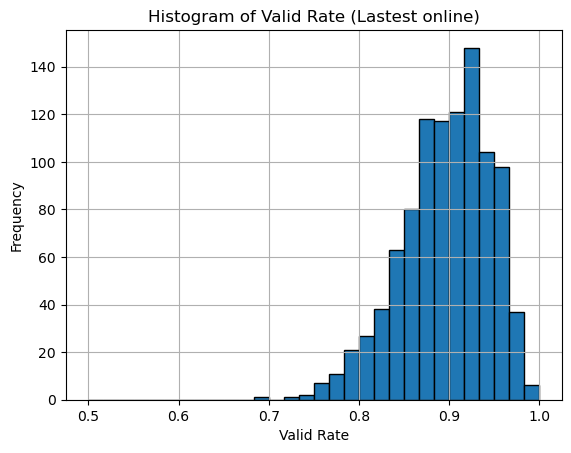

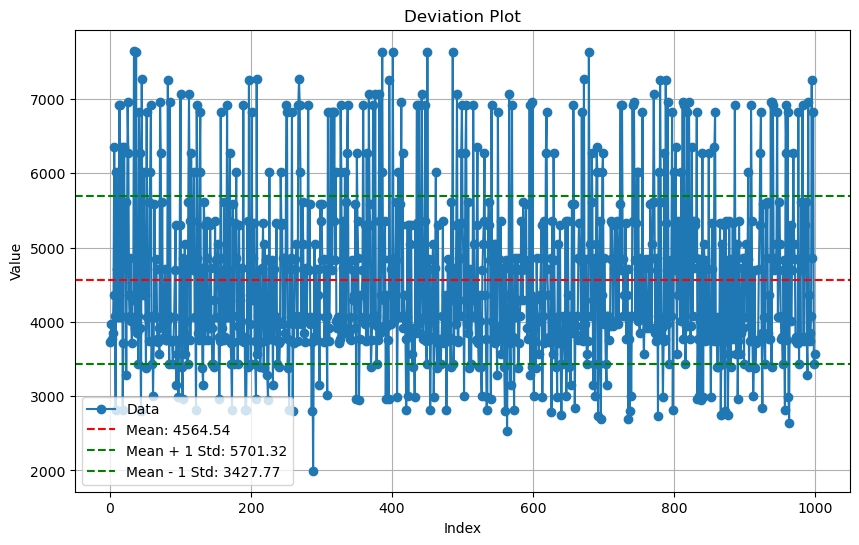

[3733.2037000000005, 3748.2533999999996, 3967.7776999999996, 3772.5829, 3844.9617999999996, 4356.0311, 6359.4524, 4081.7241, 2815.7298000000005, 6014.5718, 4716.2839, 5614.4708, 4064.0428, 6917.287600000001, 6917.287600000001, 4064.0428, 4081.7241, 6359.4524, 2807.5294, 3711.0241, 6359.4524, 4730.4692000000005, 5614.4708, 3289.3102, 4852.9805, 6954.3789, 6276.3153999999995, 4356.0311, 4081.7241, 4856.2597, 4017.5018, 3720.9909000000007, 4296.8783, 4356.0311, 7651.5781, 4856.2597, 3917.4730000000004, 7631.4394, 3844.9617999999996, 4081.7241, 3435.817399999999, 6823.5607, 6276.3153999999995, 3917.4730000000004, 2794.6583, 7264.582699999999, 4730.4692000000005, 4356.0311, 6014.5718, 4730.4692000000005, 4356.0311, 3380.9372000000003, 6823.5607, 4064.0428, 4064.0428, 3748.6512000000002, 5614.4708, 6014.5718, 6926.908100000001, 3435.817399999999, 4081.7241, 2997.0169999999994, 3748.2533999999996, 5581.3828, 4064.0428, 4852.9805, 4716.2839, 3772.5829, 3733.2037000000005, 3917.4730000000004, 3

In [ ]:
# normalization / 100
offline_verfication(1000, 40, 0.1)